<a href="https://colab.research.google.com/github/LRManamperi/Machine-Learning/blob/main/Titanic-KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Display first few rows
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-4-d5b295a0f20a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette='coolwarm')


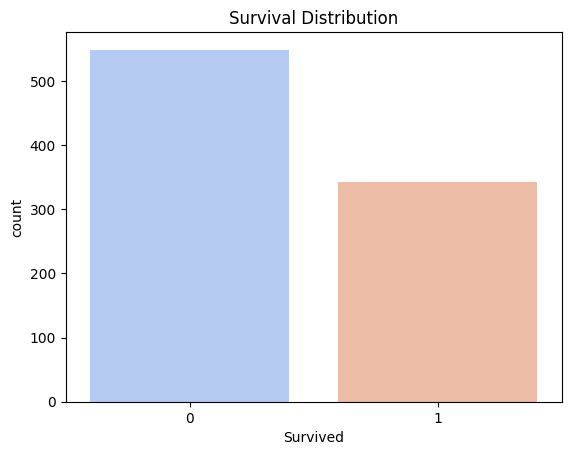

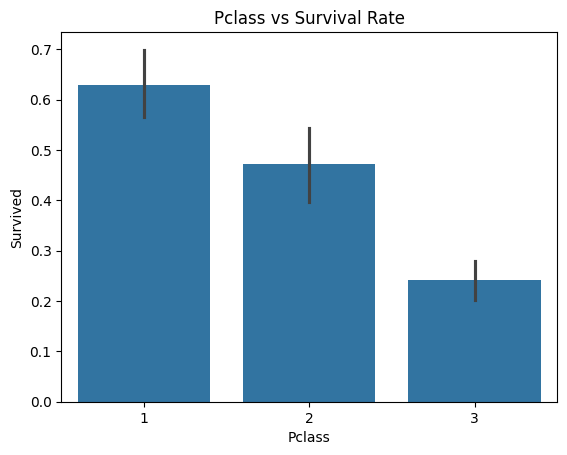

In [4]:
# Check for missing values
print(train_data.isnull().sum())

# Survival count plot
sns.countplot(x='Survived', data=train_data, palette='coolwarm')
plt.title("Survival Distribution")
plt.show()

# Class vs Survival
sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.title("Pclass vs Survival Rate")
plt.show()


In [5]:
# Drop irrelevant columns
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
train_data = train_data.drop(columns=drop_cols)
test_data = test_data.drop(columns=drop_cols)

# Fill missing Age values with median
imputer = SimpleImputer(strategy="median")
train_data["Age"] = imputer.fit_transform(train_data[["Age"]])
test_data["Age"] = imputer.transform(test_data[["Age"]])

# Fill missing Fare values in test set
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

# Fill missing Embarked values with most common
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

# Convert categorical data to numerical
encoder = LabelEncoder()
train_data["Sex"] = encoder.fit_transform(train_data["Sex"])
test_data["Sex"] = encoder.transform(test_data["Sex"])

train_data["Embarked"] = encoder.fit_transform(train_data["Embarked"])
test_data["Embarked"] = encoder.transform(test_data["Embarked"])

# Feature Engineering: Create Family Size
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

# Drop SibSp and Parch as FamilySize replaces them
train_data = train_data.drop(columns=["SibSp", "Parch"])
test_data = test_data.drop(columns=["SibSp", "Parch"])

train_data.head()


<ipython-input-5-61dc5f17c215>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
<ipython-input-5-61dc5f17c215>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,2,1


In [6]:
# Define features and target
X = train_data.drop(columns=["Survived"])
y = train_data["Survived"]

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)


Training Data Shape: (712, 6)
Validation Data Shape: (179, 6)


In [7]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [8]:
# Predict on test set
test_predictions = model.predict(test_data)

# Load the original test dataset to get PassengerId
original_test = pd.read_csv("test.csv")

# Create submission file
submission = pd.DataFrame({"PassengerId": original_test["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv ✅")


Submission file saved as submission.csv ✅
